# 单个产品数据分析

### 一、载入库

In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')


### 二、载入目标数据源
        做好初步的数据清理，和类型装换
    

In [2]:
#使用自定义标题栏方式读入数据
columns = ['开始日期','类目名称','买家数','成交金额','搜索人数','成交金额占比','成交金额同比','成交人数占比','成交人数同比','客单价','UV价值']
df = pd.read_csv('./data/3C数码1710.csv',names = columns,sep = ',')
df.drop([0],inplace = True)  #删除 首行标题

#直接载入 带标题的方式
#df = pd.read_csv('./data/3C数码1710.csv',sep = ',')

#处理日期拆分及类型转换
new_date=df['开始日期'].str.split("|", n = 1, expand = True) 
df['开始日期']=new_date[0]
df['结束日期']=new_date[1]
df['开始日期']=pd.to_datetime(df['开始日期'].astype(str),format='%Y-%m-%d')
df['结束日期']=pd.to_datetime(df['结束日期'].astype(str),format='%Y-%m-%d')

# df


# 批量载入数据处理分析

### 一、载入库

In [10]:
import os
import pandas as pd

### 二、批量载入目录下全部数据文件
        1.批量载入数据文件

In [34]:
#读目录文件列表
# excel_names=[]
# for excel_name in os.listdir("./data"):
#     excel_names.append(excel_name)
excel_names=[excel_name for excel_name in os.listdir("./data")]


#读全部
df_list=[]
for excel_name in excel_names:
    filename="./data/{}".format(excel_name)
    df=pd.read_csv(filename,sep=",")
    df_list.append(df)   
df_merge=pd.concat(df_list)

df_merge

,日期,类目名称,买家数,成交金额,搜索人数,成交金额占比,成交金额同比,成交人数占比,成交人数同比,客单价,UV价值
0,2017-10-01|2017-10-31,手机保护套/壳,27524495,503205377,82138973,38.16%,70.34%,52.07%,11.20%,18.28,6.13
1,2017-10-01|2017-10-31,手机贴膜,18384095,190704104,26656100,11.79%,28.26%,25.05%,16.74%,10.37,7.15
2,2017-10-01|2017-10-31,手机零部件,2125787,189281648,15767938,11.72%,12.75%,5.28%,11.70%,89.04,12.00
3,2017-10-01|2017-10-31,移动电源,2801112,188888518,14276910,11.70%,27.56%,7.22%,11.89%,67.43,13.23
4,2017-10-01|2017-10-31,手机数据线,4178627,153248705,10788473,8.04%,68.09%,11.07%,22.33%,36.67,14.20
...,...,...,...,...,...,...,...,...,...,...,...
229,2020-09-01|2020-09-30,分压盒,1,2425,36,-,1488.67%,-,68.95%,2425.00,67.36
230,2020-09-01|2020-09-30,白平衡镜,1,1826,56,-,-46.39%,-,11.19%,1826.00,32.61
231,2020-09-01|2020-09-30,Lomo潜水盒,1,133,22,-,-90.94%,-,-72.61%,133.00,6.05
232,2020-09-01|2020-09-30,移动支付终端机,0,0,4,-,-99.95%,-,-99.95%,0.00,0.00


In [35]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7850 entries, 0 to 233
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      7850 non-null   object 
 1   类目名称    7850 non-null   object 
 2   买家数     7850 non-null   int64  
 3   成交金额    7850 non-null   int64  
 4   搜索人数    7850 non-null   int64  
 5   成交金额占比  7850 non-null   object 
 6   成交金额同比  7850 non-null   object 
 7   成交人数占比  7850 non-null   object 
 8   成交人数同比  7850 non-null   object 
 9   客单价     7850 non-null   float64
 10  UV价值    7850 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 735.9+ KB


#### 查看变量相关性

In [37]:
del df_merge['日期']
col_names = ["items","saler","money","search","money_per","money_same","person_per","person_same","customer_per","uv","beginTime","endTime"]
df_merge.columns=col_names
df_merge.to_csv("xizi.csv",index=False)


In [23]:
import numpy as np
num_feature=df_merge.select_dtypes(include=[np.number])
# num_feature
corr=num_feature.corr()
corr

,买家数,成交金额,搜索人数,成交金额占比,成交金额同比,成交人数占比,成交人数同比,客单价,UV价值
买家数,1.000000,0.859465,0.964259,0.896268,-0.015308,0.980015,-0.017955,-0.028809,-0.026827
成交金额,0.859465,1.000000,0.921741,0.965794,-0.020025,0.883563,-0.020270,-0.034661,-0.010669
搜索人数,0.964259,0.921741,1.000000,0.948885,-0.015392,0.971607,-0.014879,-0.034950,-0.030755
成交金额占比,0.896268,0.965794,0.948885,1.000000,-0.018164,0.927675,-0.022321,-0.029509,-0.019434
成交金额同比,-0.015308,-0.020025,-0.015392,-0.018164,1.000000,-0.015699,0.516274,0.136340,0.084752
成交人数占比,0.980015,0.883563,0.971607,0.927675,-0.015699,1.000000,-0.019220,-0.029221,-0.027039
成交人数同比,-0.017955,-0.020270,-0.014879,-0.022321,0.516274,-0.019220,1.000000,-0.012902,0.002898
客单价,-0.028809,-0.034661,-0.034950,-0.029509,0.136340,-0.029221,-0.012902,1.000000,0.189555
UV价值,-0.026827,-0.010669,-0.030755,-0.019434,0.084752,-0.027039,0.002898,0.189555,1.000000


### 三、数据初步加工
        1.日期数据拆分
        2.重建索引列
        3.处理特殊符号-

In [36]:

#重建索引序列
df_merge.reset_index(inplace=True, drop=True)

#处理日期拆分及类型转换
new_date=df_merge['日期'].str.split("|", n = 1, expand = True) 
df_merge['开始日期']=new_date[0]
df_merge['结束日期']=new_date[1]
df_merge['开始日期']=pd.to_datetime(df_merge['开始日期'].astype(str),format='%Y-%m-%d')
df_merge['结束日期']=pd.to_datetime(df_merge['结束日期'].astype(str),format='%Y-%m-%d')

#特殊列字符含有-符号，需要处理为0
column_list=['成交金额占比','成交金额同比','成交人数占比','成交人数同比']
for column in column_list:
    df_merge[column]=df_merge[column].replace("-","0") 
    df_merge[column]=df_merge[column].str.replace("%","") 
    df_merge[column]=df_merge[column].astype("float64")

# df_merge[210:220]

### 四、锁定目标产品
    例: 类别名称 = 苹果卡贴  的数据集
    #查询哪里列字段存在 空值
    apple.apply(lambda x: sum(x.isnull())/len(x))

In [6]:
#--------------------------------------------下面输入更改你的 搜索内容
apple_object = df_merge[df_merge['类目名称'] == '影室灯']  #《--这里
#重建索引序列
apple_object.reset_index(inplace=True, drop=True)
#选取一个列作为索引
apple_object.set_index(apple_object['开始日期'],inplace=True)
# apple.info()
# apple_object.head(5)


In [7]:
# 新列-成交比例
apple_object['成交比例'] = apple_object['买家数']/apple_object['搜索人数']*100
# 新列-成交比3M均线
# aaa=apple_object['成交比3M均线']=apple_object['成交比例'].resample('3M',label='left').mean()
apple_object['成交比3M均线']=apple_object['成交比例'].rolling(3).mean()
# 新列-活跃值 (= 成交比 - 成交比3M均线)
apple_object['活跃'] = apple_object['成交比例'] - apple_object['成交比3M均线']
aa=apple_object['2019-10-01':'2019-10-01']
# apple_object.head(50)


In [8]:
# 输入要分析的列表
column1 = '成交比例'
column2 = '成交比3M均线'

In [9]:
# 文档：https://matplotlib.org/tutorials/introductory/pyplot.html
from matplotlib.font_manager import FontProperties
# 获取macos的中文字体支持库
def getChineseFont():  
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc',size=15)
#字体添加
#plt.title(u'产品购买意图分析', fontproperties=getChineseFont()) #每一行都要添加，是不是很麻烦？
#--------------------------------------------------------------
#绘图尺寸
fig=plt.figure(figsize=(40,10))
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.title('成交活跃分析', fontproperties=getChineseFont())
# 索引作为索引
plt.xticks=apple_object.index.to_list()
plt.xlabel('成交比/成交比3M均线', fontproperties=getChineseFont())
plt.ylabel('活跃值', fontproperties=getChineseFont())
#--------------------------------------------------------------

# lin1
lin1=plt.plot(apple_object.index,apple_object[column1])
plt.setp(lin1, 'color', 'red', 'linewidth', 1.0)
# lin2
lin2=plt.plot(apple_object.index,apple_object[column2])
plt.setp(lin2, 'color', 'green', 'linewidth', 3.0)


plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\System\\Library\\Fonts\\PingFang.ttc'

### 五、全部产品销售活跃分析

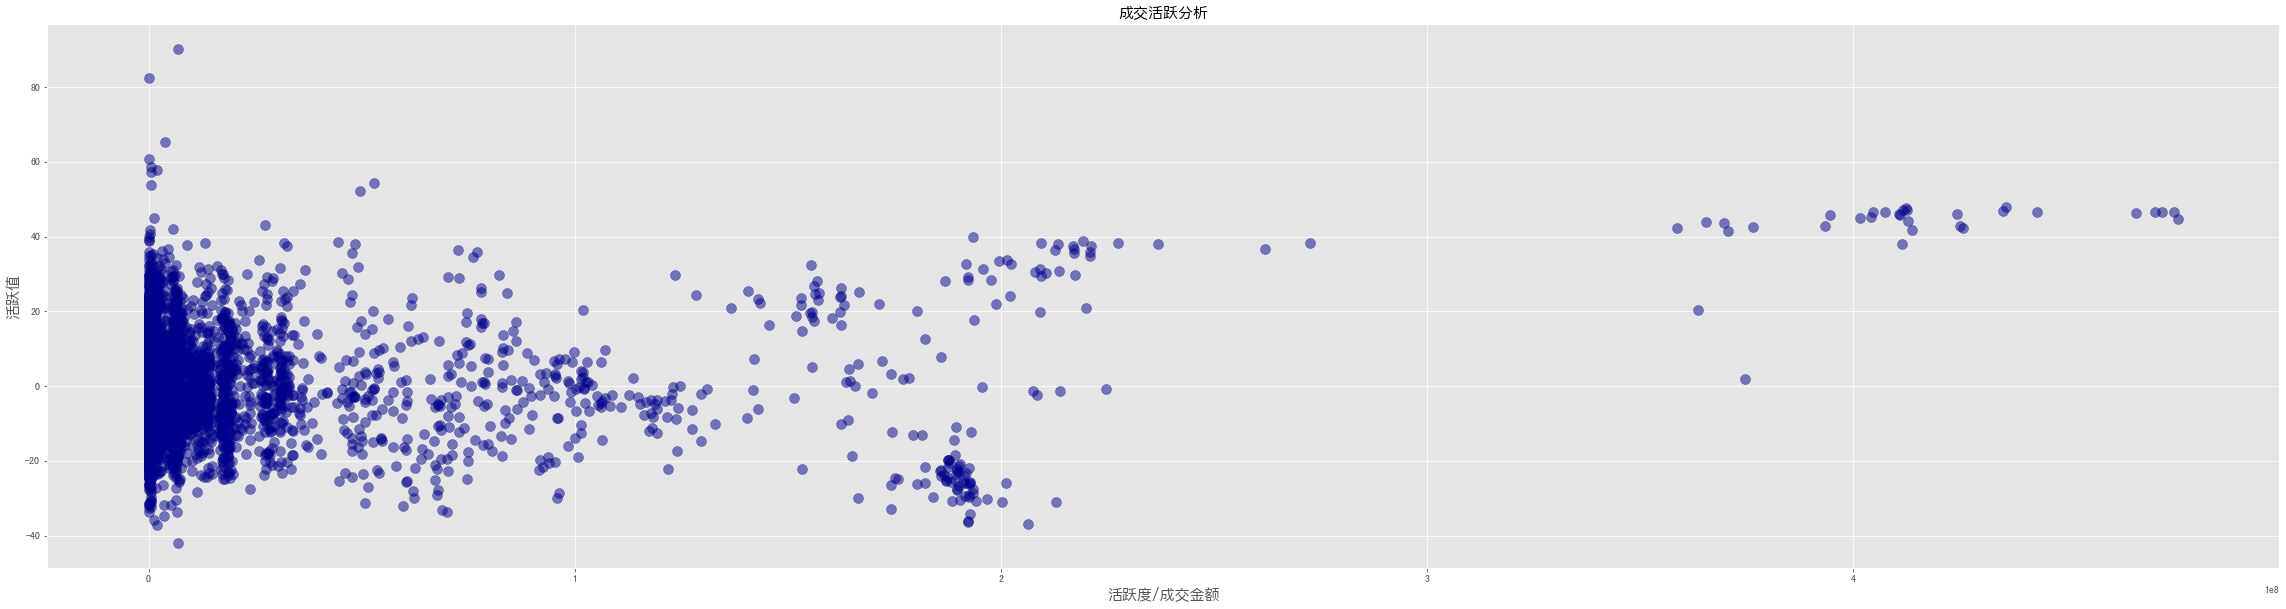

In [10]:

#分析全部数据
all_object=df_merge[:]

#选取一个列作为索引
all_object.set_index(all_object['开始日期'],inplace=True)
# 新列-成交比例
all_object['成交比例'] = all_object['买家数'] / all_object['搜索人数']*100
# 新列-成交比3M均线
all_object['成交比3M均线']=all_object['成交比例'].rolling(3).mean()
# 新列-活跃值 (= 成交比 - 成交比3M均线)
all_object['活跃'] = all_object['成交比例'] - all_object['成交比3M均线']
# bb=all_object['2019-09-01':'2019-09-01'] 
bb=all_object.loc['2019-09-01']

plt.figure(figsize=(40,10))
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.title('成交活跃分析', fontproperties=getChineseFont())
# 索引作为索引
plt.xticks=all_object.index.to_list()
plt.xlabel('活跃度/成交金额', fontproperties=getChineseFont())
plt.ylabel('活跃值', fontproperties=getChineseFont())

#ax2 = all_object.plot.scatter(x='成交金额',y='活跃',c='DarkBlue',colormap='viridis')
plt.scatter(all_object['成交金额'],all_object['活跃'], s=100, c='DarkBlue', alpha=0.5)
plt.show()
# bb.info()


In [13]:
# pychar方式实现 热度销售茶品的分析
# https://blog.csdn.net/weixin_44146276/article/details/102806654
from pyecharts.faker import Faker
from pyecharts import options as opts
from pyecharts.charts import Scatter # 导入散点图绘制模块
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode

result=all_object.loc['2020-09-01']
scatter1=(
    Scatter()
        .add_xaxis(result['成交金额'])
        .add_yaxis("活跃度",
            [list(z) for z in zip(result['活跃'], result['类目名称'])],
                    label_opts=opts.LabelOpts(
                        formatter=JsCode(# 调用js代码设置方法提取参数第2个值和参数第3个值
                            "function(params){return params.value[2] ;}"
                        ),is_show=False
                    ),
        )
        .set_global_opts(
        title_opts=opts.TitleOpts(title="产品活跃度分析"),
        tooltip_opts=opts.TooltipOpts(# tooltip是鼠标移上去的提示
            formatter=JsCode(# 调用js代码设置方法提取参数名字和参数第3个值
                "function (params) {return params.value[2];}"
            )
        ),
        visualmap_opts=opts.VisualMapOpts(
             max_=result['活跃'].max(), min_=result['活跃'].min(), dimension=1
            # dimension设置维度为1维
        ),
    )
)

scatter1.render('echarts-scatter.html')
# scatter1.render_notebook()

'/Users/sunlf/Documents/huigu-project/wife-app/echarts-scatter.html'

# 文档：https://matplotlib.org/tutorials/introductory/pyplot.html
from matplotlib.font_manager import FontProperties
# 获取macos的中文字体支持库
def getChineseFont():  
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc',size=15)
#字体添加
#plt.title(u'产品购买意图分析', fontproperties=getChineseFont()) #每一行都要添加，是不是很麻烦？

#绘图尺寸
fig=plt.figure(figsize=(40,10))
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.title('购买意图分析图', fontproperties=getChineseFont())
# 索引作为索引
plt.xticks=apple_object.index.to_list()
plt.xlabel('成交金额同比/成交人数同比', fontproperties=getChineseFont())
plt.ylabel('同比量', fontproperties=getChineseFont())

# lin1
lin1=plt.plot(apple_object.index,apple_object[column1])
plt.setp(lin1, 'color', 'red', 'linewidth', 1.0)
# lin2
lin2=plt.plot(apple_object.index,apple_object[column2])
plt.setp(lin2, 'color', 'green', 'linewidth', 3.0)

plt.show()


#apple_object[['成交金额同比','成交人数同比']].plot(kind='line',style='--g.',colormap='Accent_r',figsize=(30,8),title='购买意向分析图')